In [140]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

df = pd.read_csv('exercise_dataset_sesion3_updated.csv')

#Exploring Our Data

In [141]:
df.head(5)

,Gender,Age,Salary,Purchased
0,Male,19.0,19000.0,NO
1,Female,35.0,20000.0,NO
2,Female,26.0,43000.0,NO
3,Female,NaN,57000.0,NO
4,Male,19.0,76000.0,NO


In [142]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Gender     400 non-null    object 
 1   Age        388 non-null    float64
 2   Salary     392 non-null    float64
 3   Purchased  400 non-null    object 
dtypes: float64(2), object(2)
memory usage: 12.6+ KB


In [143]:
df.columns

Index(['Gender', 'Age', 'Salary', 'Purchased'], dtype='object')

##Summary for Numerical Data
*   Summary Statistics for Numerical variables
*   Plot Numerical variables Histogram





In [144]:
df.describe()

,Age,Salary
count,388.000000,392.000000
mean,37.680412,69931.122449
std,10.401795,34178.227777
min,18.000000,15000.000000
25%,30.000000,43000.000000
50%,37.000000,70000.000000
75%,46.000000,88000.000000
max,60.000000,150000.000000


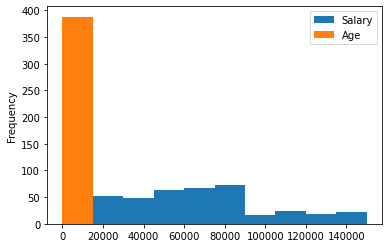

In [145]:
df[['Salary','Age']].plot(kind='hist')

#Summary for Nominal Data

*   Count Nominal variables
*   Plot  Nominal variables Pie Chart



In [146]:
df[['Gender','Purchased']].value_counts()

Gender  Purchased
Female  NO           157
Male    NO           100
Female  YES           88
Male    YES           55
dtype: int64

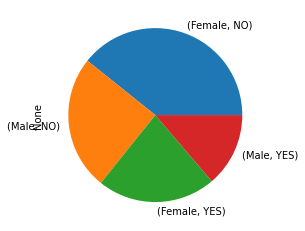

In [147]:
df[['Gender','Purchased']].value_counts().plot(kind='pie')

#Outliers Detection

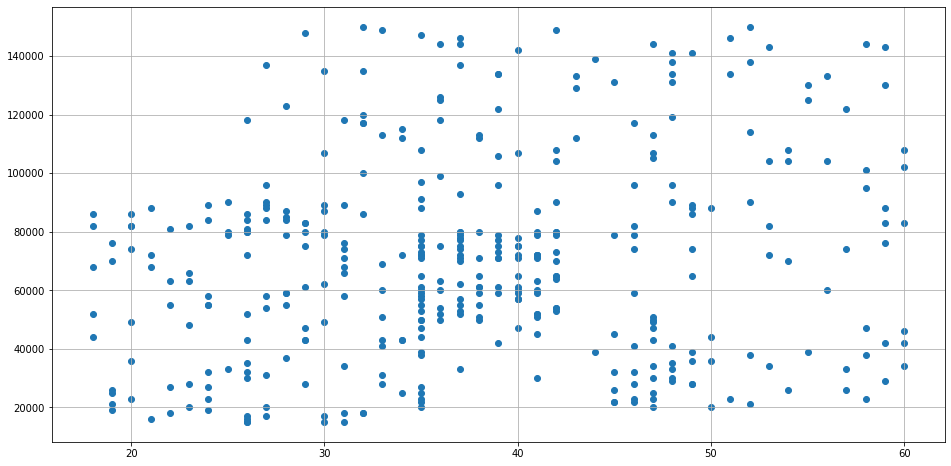

In [148]:
fig, ax = plt.subplots(figsize=(16,8))
plt.grid()
ax.scatter(df['Age'], df['Salary'])
plt.show()

#Identify Null Values

In [149]:
df.isnull().sum()

Gender        0
Age          12
Salary        8
Purchased     0
dtype: int64

#Split Independent & Dependent Columns

In [150]:
X = df.iloc[:,:-1].values
y = df.iloc[:,-1].values
X

array([['Male', 19.0, 19000.0],
       ['Female', 35.0, 20000.0],
       ['Female', 26.0, 43000.0],
       ...,
       ['Female', 50.0, 20000.0],
       ['Male', 36.0, nan],
       ['Female', 49.0, 36000.0]], dtype=object)

#Data Cleaning 

##1.   Remove Null values Replace with Mean



In [151]:
from sklearn.impute import SimpleImputer 
imputer = SimpleImputer(missing_values = np.nan,strategy='mean')
imputer = imputer.fit(X[:,1:3])
X[:,1:3] = imputer.transform(X[:,1:3])
X

array([['Male', 19.0, 19000.0],
       ['Female', 35.0, 20000.0],
       ['Female', 26.0, 43000.0],
       ...,
       ['Female', 50.0, 20000.0],
       ['Male', 36.0, 69931.12244897959],
       ['Female', 49.0, 36000.0]], dtype=object)

#Encoding Categorical Variables

*   Independent 
*   Dependent



In [152]:
HotEncod = OneHotEncoder()
ct = ColumnTransformer(transformers= [('encoder',OneHotEncoder(),[0])], remainder= 'passthrough')
X = ct.fit_transform(X)
LabEncod = LabelEncoder()
y = LabEncod.fit_transform(y)

#Splitting our data for Test

In [153]:
train_test_split(X,y,test_size = 0.2)
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.2)
X_train, X_test, y_train, y_test

(array([[0.0, 1.0, 42.0, 80000.0],
        [1.0, 0.0, 47.0, 105000.0],
        [1.0, 0.0, 45.0, 32000.0],
        ...,
        [1.0, 0.0, 40.0, 47000.0],
        [1.0, 0.0, 30.0, 87000.0],
        [0.0, 1.0, 60.0, 42000.0]], dtype=object),
 array([[0.0, 1.0, 52.0, 114000.0],
        [0.0, 1.0, 47.0, 25000.0],
        [1.0, 0.0, 29.0, 43000.0],
        [1.0, 0.0, 24.0, 58000.0],
        [0.0, 1.0, 37.68041237113402, 71000.0],
        [1.0, 0.0, 39.0, 134000.0],
        [1.0, 0.0, 37.68041237113402, 44000.0],
        [0.0, 1.0, 20.0, 36000.0],
        [1.0, 0.0, 43.0, 112000.0],
        [1.0, 0.0, 47.0, 107000.0],
        [1.0, 0.0, 27.0, 84000.0],
        [0.0, 1.0, 35.0, 65000.0],
        [1.0, 0.0, 21.0, 88000.0],
        [1.0, 0.0, 38.0, 50000.0],
        [1.0, 0.0, 36.0, 54000.0],
        [1.0, 0.0, 53.0, 82000.0],
        [0.0, 1.0, 30.0, 89000.0],
        [1.0, 0.0, 48.0, 29000.0],
        [1.0, 0.0, 35.0, 57000.0],
        [1.0, 0.0, 57.0, 26000.0],
        [0.0, 1.0, 29.0, 61000

#Standard Scaler for Variables

In [154]:
sc = StandardScaler()
X_train[:,3:] = sc.fit_transform(X_train[:,3:])
X_train

array([[0.0, 1.0, 42.0, 0.2800948849626893],
       [1.0, 0.0, 47.0, 1.0209516483573189],
       [1.0, 0.0, 45.0, -1.1423501007549994],
       ...,
       [1.0, 0.0, 40.0, -0.6978360427182217],
       [1.0, 0.0, 30.0, 0.48753477871318557],
       [0.0, 1.0, 60.0, -0.8460073953971476]], dtype=object)

In [155]:
X_test[:,3:] = sc.transform(X_test[:,3:])
X_test

array([[0.0, 1.0, 52.0, 1.2876600831793856],
       [0.0, 1.0, 47.0, -1.3497899945054959],
       [1.0, 0.0, 29.0, -0.8163731248613625],
       [1.0, 0.0, 24.0, -0.37185906682458475],
       [0.0, 1.0, 37.68041237113402, 0.01338645014062265],
       [1.0, 0.0, 39.0, 1.8803454938950892],
       [1.0, 0.0, 37.68041237113402, -0.7867388543255773],
       [0.0, 1.0, 20.0, -1.0238130186118588],
       [1.0, 0.0, 43.0, 1.228391542107815],
       [1.0, 0.0, 47.0, 1.0802201894288892],
       [1.0, 0.0, 27.0, 0.39863196710583004],
       [0.0, 1.0, 35.0, -0.16441917307408846],
       [1.0, 0.0, 21.0, 0.5171690492489708],
       [1.0, 0.0, 38.0, -0.6089332311108662],
       [1.0, 0.0, 36.0, -0.4903961489677255],
       [1.0, 0.0, 53.0, 0.3393634260342597],
       [0.0, 1.0, 30.0, 0.5468033197847559],
       [1.0, 0.0, 48.0, -1.231252912362355],
       [1.0, 0.0, 35.0, -0.4014933373603699],
       [1.0, 0.0, 57.0, -1.3201557239697106],
       [0.0, 1.0, 29.0, -0.28295625521722917],
       [1.0, 0